# Comparison of XCMS and asari results on Agilent data

Input are ST001667 data, 12 samples on Agilent 6530 QTOF.

XCMS script is based on asari/doc/xcms_MT01.R.

SL 2022-05-25

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# from asari.mass_functions import complete_mass_paired_mapping

In [2]:
!ls RICIN_Agilent

full_Feature_table.tsv	RICIN_XCMS_featureTable.csv  run_xcms_RICIN.R


In [3]:
# feature tables
TA = pd.read_csv('RICIN_Agilent/full_Feature_table.tsv', sep='\t', header=0, index_col=0)
TA

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,...,20190805_Pincus_8-6,20190805_Pincus_8-8,20190805_Pincus_8-9,20190805_Pincus_9-10,20190805_Pincus_9-2,20190805_Pincus_9-4,20190805_Pincus_9-5,20190805_Pincus_9-7,20190805_Pincus_9-8,20190805_Pincus_9-9
id_number,,,,,,,,,,,,,,,,,,,,,
F1,58.0644,377.69,372.63,384.77,0,168405,1.0,0.99,28,3,...,0,0,0,51886,0,0,0,0,0,57321
F2,59.0490,62.13,59.10,65.17,1,146216,1.0,0.93,13,2,...,0,0,73030,0,0,0,0,0,0,0
F3,59.0490,75.28,65.17,134.95,1,1201190,1.0,0.83,15,2,...,0,0,598004,0,0,0,0,0,0,0
F4,59.0731,376.68,370.61,382.75,3,225325,1.0,0.99,25,4,...,0,0,0,80122,44310,0,0,56663,0,64875
F5,71.0843,68.20,60.11,104.61,5,312110,1.0,0.80,13,2,...,0,0,0,0,0,0,0,179955,203552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F4213,993.6721,427.25,419.16,432.31,4504,12528563,1.0,0.98,2921,12,...,746029,597097,752208,1249305,1086618,1668,658952,1040524,1114861,1179772
F4214,993.7159,373.65,368.59,377.69,4505,39164,1.0,0.98,10,1,...,39168,0,0,0,0,0,0,0,0,0
F4215,993.7269,375.67,370.61,380.73,4506,74271,1.0,0.82,10,2,...,0,0,0,0,0,0,0,41067,0,40464


In [13]:
TA['rtime'].max()

1497.3

In [4]:
TX = pd.read_csv('RICIN_Agilent/RICIN_XCMS_featureTable.csv', sep=',', header=0, index_col=0)
TX

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,X20190805_Pincus_8.3.mzML,X20190805_Pincus_8.5.mzML,X20190805_Pincus_8.6.mzML,X20190805_Pincus_8.8.mzML,X20190805_Pincus_8.9.mzML,X20190805_Pincus_9.10.mzML,X20190805_Pincus_9.2.mzML,X20190805_Pincus_9.4.mzML,X20190805_Pincus_9.5.mzML,X20190805_Pincus_9.7.mzML,X20190805_Pincus_9.8.mzML,X20190805_Pincus_9.9.mzML
FT001,57.069672,57.069672,57.069672,74.853100,74.273972,75.432228,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.567335e+05,1.831907e+05,NaN
FT002,58.064396,58.064396,58.064396,116.281231,115.261467,117.300995,2,1.735006e+05,NaN,NaN,NaN,1.786182e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT003,59.049007,59.049007,59.049007,78.486614,78.485596,78.487633,2,6.745021e+05,NaN,NaN,NaN,6.670408e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT004,71.084251,71.084251,71.084251,75.424591,74.273972,75.432228,3,NaN,NaN,1.766721e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.862680e+05,2.080387e+05,NaN
FT005,72.934502,72.934502,72.934502,590.221130,586.457214,592.961182,4,5.262645e+06,4.663433e+06,NaN,5.812145e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.755087e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT509,806.564026,806.564026,806.564026,375.513687,372.477997,378.942139,12,3.626361e+06,3.597862e+06,3.460220e+06,3.362507e+06,3.279964e+06,3.961145e+06,4.212385e+06,3.346202e+06,1.637650e+06,3.765158e+06,3.780631e+06,3.763732e+06
FT510,807.561829,807.561829,807.561829,368.431030,366.448334,370.461914,9,3.217328e+06,3.272197e+06,3.158239e+06,3.162452e+06,2.982056e+06,3.519261e+06,2.948538e+06,NaN,3.334079e+06,NaN,3.443265e+06,NaN
FT511,808.570129,808.570129,808.570129,367.305298,366.408783,367.420227,3,3.023578e+06,NaN,2.455121e+06,2.418685e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT512,810.588623,810.588623,810.588623,365.396637,365.250854,365.397247,3,3.604803e+06,NaN,NaN,3.540801e+06,3.543402e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mz_a, rt_a = TA['mz'].to_list(), TA['rtime'].to_list()
mz_x, rt_x = TX['mzmed'].to_list(), TX['rtmed'].to_list()
N1_, N2_ = len(mz_a), len(mz_x)
print(N1_, N2_)

4217 513


In [14]:
# match functions
# 0.000010 is 10 ppm
PPM_tolerance = 0.000015
# use a large number to include anything in RTime, small number to be specific
RTime_tolerance = 30       # seconds in retention time, usually a small number
                            # more lenient for diff instruments
                            # and possible diff void volume
             
# F1 = (m/z, rt)
def match2(F1, F2, PPM_tolerance=PPM_tolerance, RTime_tolerance=RTime_tolerance):
    if abs(F1[0]-F2[0])/F1[0] < PPM_tolerance and abs(F1[1] - F2[1]) < RTime_tolerance:
        return True
    else:
        return False
    
# test
match2((129.1541, 55), (129.1538, 14))

False

In [15]:
good = []
for ii in range(N1_):
    F1 = (mz_a[ii], rt_a[ii])
    for jj in range(N2_):
        F2 = (mz_x[jj], rt_x[jj])
        if match2(F1, F2, ):
            good.append((ii, jj))
            
print(len(good), good[:5])

411 [(1, 2), (2, 2), (4, 3), (7, 117), (14, 216)]


In [17]:
files = [x for x in TX.columns if '.mzML' in x]
len(files)

12

In [32]:
# get a random file name
import random
ii = random.randint(0, 11)
print(ii)
files[ii]

7


'X20190805_Pincus_9.4.mzML'

In [33]:
NIST_TA = TA[['mz', 'rtime', '20190805_Pincus_9-4']][TA['20190805_Pincus_9-4']>0]
NIST_TA

,mz,rtime,20190805_Pincus_9-4
id_number,,,
F6,175.0938,35.84,824246
F7,175.0938,78.32,251339
F8,175.0938,1497.30,442753
F12,267.2074,62.13,9417
F13,267.2074,79.33,131861
...,...,...,...
F4202,987.6192,169.35,93041
F4203,987.6520,397.92,59751
F4213,993.6721,427.25,1668


In [34]:
NIST_TX = TX[['mzmed', 'rtmed', 'X20190805_Pincus_9.4.mzML']][TX['X20190805_Pincus_9.4.mzML'].notna()]
NIST_TX

,mzmed,rtmed,X20190805_Pincus_9.4.mzML
FT008,89.057709,74.401115,8.648152e+05
FT013,110.033859,185.275925,4.225897e+05
FT016,112.893898,224.468185,9.847606e+05
FT017,113.104607,112.191040,3.935105e+05
FT029,118.084557,369.443848,2.305738e+06
...,...,...,...
FT499,760.573547,375.513626,4.446095e+06
FT500,761.580933,375.504150,2.447676e+06
FT501,780.545898,372.055603,1.127375e+06
FT509,806.564026,375.513687,3.346202e+06


In [35]:
mz_a, rt_a = NIST_TA['mz'].to_list(), NIST_TA['rtime'].to_list()
mz_x, rt_x = NIST_TX['mzmed'].to_list(), NIST_TX['rtmed'].to_list()
N1_, N2_ = len(mz_a), len(mz_x)
print(N1_, N2_)

1430 165


In [36]:
good = []
for ii in range(N1_):
    F1 = (mz_a[ii], rt_a[ii])
    for jj in range(N2_):
        F2 = (mz_x[jj], rt_x[jj])
        if match2(F1, F2):
            good.append((ii, jj))

In [37]:
len(good)

139

In [38]:
good[:4]

[(2, 45), (5, 77), (9, 46), (13, 78)]

In [39]:
# not in overlap but in XCMS
set2 = set([x[1] for x in good])
print(len(set2))
xcms_only = [jj for jj in range(N2_) if jj not in set2]
print(len(xcms_only), xcms_only[:5])


111
54 [6, 7, 8, 9, 11]


In [40]:
# not in overlap but in asari
set1 = set([x[0] for x in good])
print(len(set1))
asari_only = [ii for ii in range(N1_) if ii not in set1]
print(len(asari_only), asari_only[:5])


139
1291 [0, 1, 3, 4, 6]


In [41]:
good_xcms = [x[1] for x in good]
use_pairs = [x for x in good if good_xcms.count(x[1])==1]

g2 = [x[0] for x in good]
use_pairs2 = [x for x in good if g2.count(x[0])==1]

print(len(use_pairs2), len(use_pairs))

LL = set(use_pairs2).intersection(set(use_pairs))

print(len(LL))

139 84
84


In [42]:

X0 = [x[0] for x in LL]
X1 = [x[1] for x in LL]
v_xcms = NIST_TX['X20190805_Pincus_9.4.mzML'].iloc[X1].to_list()
v_asari = NIST_TA['20190805_Pincus_9-4'].iloc[X0].to_list()


CM = pd.DataFrame(
{
    'xcms': v_xcms, 'asari': v_asari
})

print(CM.shape)
CM = CM[CM['xcms'] > 1][CM['asari']>1]
print(CM.shape)

CM = np.log2(CM+1)

CM.corr()

(84, 2)
(84, 2)


,xcms,asari
xcms,1.000000,0.977725
asari,0.977725,1.000000


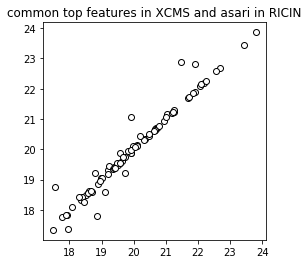

In [43]:
plt.figure(figsize=(4,4))
plt.plot(CM['xcms'], CM['asari'], color='w', marker='o', mew=1, mec='k')
plt.title("common top features in XCMS and asari in RICIN")


plt.savefig("Agilent_RICINE_20190805_Pincus_9-4_compr.pdf")

 ## Covered
 
 4217 513
 
 411 matched in 15 ppm, 30 sec.
 
 
For sample RICINE_20190805_Pincus_9-4,

1430 165

84 matched. r=0.98.